# Regression with MCMC : Optimizing profits on bike rents

### Exploring the dataset

Markov Chain Monte Carlo, or MCMC, combines the concepts of Monte Carlo sampling with Markov Chains' property of converging to a steady state. This allows sampling draws from any, even unknown, posterior distribution. We will be using this method to predict the optimized temperature for bike rent.


We will try to predict the number of bikes rented per day in a bike-sharing system to solve this optimization problem. Let us explore the dataset first.

In [1]:
import pandas as pd
bikes = pd.read_csv("dataset/bikes_test.csv")
bikes.head()


,work_day,temp,humidity,wind_speed,num_bikes
0,0,0.265833,0.687917,0.175996,2.947
1,1,0.282609,0.622174,0.153800,3.784
2,1,0.354167,0.496250,0.147379,4.375
3,1,0.256667,0.722917,0.133721,2.802
4,1,0.265000,0.562083,0.194037,3.830


We will first separate our training and testing data

In [2]:
# Select the last 5 rows for bikes_test
bikes_test = bikes.iloc[-5:]

# Select the rest of the rows for bikes_train
bikes_train = bikes.iloc[:-5]

### Generate regression models


We will first create a model with `temp` and `work_day` as independent variables and generate a sample distribution


In [3]:
import pymc3 as pm
formula = "num_bikes ~ temp + work_day"

with pm.Model() as model_1:
    # pm.GLM.from_formula(formula, data=bikes)
    # trace_1 = pm.sample(draws=1000, tune=500)
    pm.GLM.from_formula(formula, data=bikes_train, family=pm.glm.families.Normal())

    # Increase the number of tuning steps and draw more samples
    trace_1 = pm.sample(draws=1000, tune=10000, target_accept=0.99,  return_inferencedata=True)

The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, work_day, temp, Intercept]


Sampling 4 chains for 10_000 tune and 1_000 draw iterations (40_000 + 4_000 draws total) took 604 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


Let us now visualize the traceplot of this distribution


C:\Users\88016\AppData\Local\Temp/ipykernel_28744/1118348562.py:6: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_1)


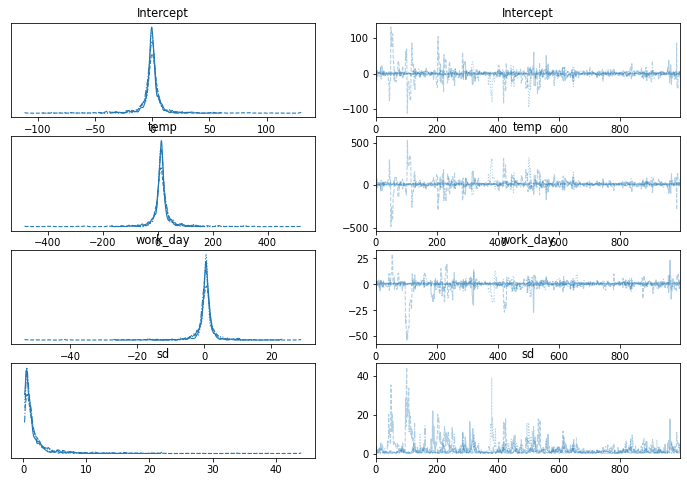

In [4]:
# Import pymc3
import pymc3 as pm
import matplotlib.pyplot as plt

# Draw a trace plot of trace_1
pm.traceplot(trace_1)
plt.show()


We see that , the 4 parameters converges. Now let us also see the forestplot


C:\Users\88016\AppData\Local\Temp/ipykernel_28744/3723906312.py:2: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace_1)


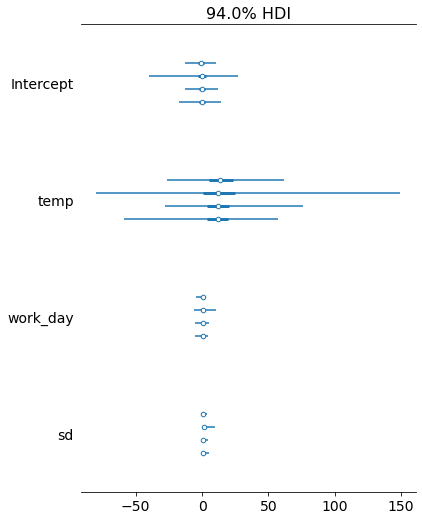

In [5]:

# Draw a forest plot of trace_1
pm.forestplot(trace_1)
plt.show()

We will now see the summary of the trace.


In [6]:
pm.summary(trace_1)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.617,11.408,-20.253,14.398,0.369,0.386,1132.0,659.0,1.01
temp,14.263,43.154,-41.403,86.108,1.555,1.466,1044.0,651.0,1.01
work_day,0.100,4.072,-5.293,5.741,0.205,0.168,1179.0,519.0,1.01
sd,1.910,2.944,0.194,5.688,0.233,0.165,166.0,354.0,1.02


All parameter has r_hat of 1.0 which shows that there is no issue in convergence. We will create another model with `temp`, `work_day` and  `wind_speed` as independent variables and generate another sample distribution


In [7]:
formula = "num_bikes ~ temp + work_day + wind_speed"

with pm.Model() as model_2:
    # pm.GLM.from_formula(formula, data=bikes)
    # trace_2 = pm.sample(draws=1000, tune=1000)
    pm.GLM.from_formula(formula, data=bikes_train, family=pm.glm.families.Normal())

    # Increase the number of tuning steps and draw more samples
    trace_2 = pm.sample(draws=1000, tune=10000, target_accept=0.99,  return_inferencedata=True)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, wind_speed, work_day, temp, Intercept]


Sampling 4 chains for 10_000 tune and 1_000 draw iterations (40_000 + 4_000 draws total) took 1400 seconds.
There were 66 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.888639521580399, but should be close to 0.99. Try to increase the number of tuning steps.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Let us also visualize the traceplot for this new model.


C:\Users\88016\AppData\Local\Temp/ipykernel_28744/765076770.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_2)


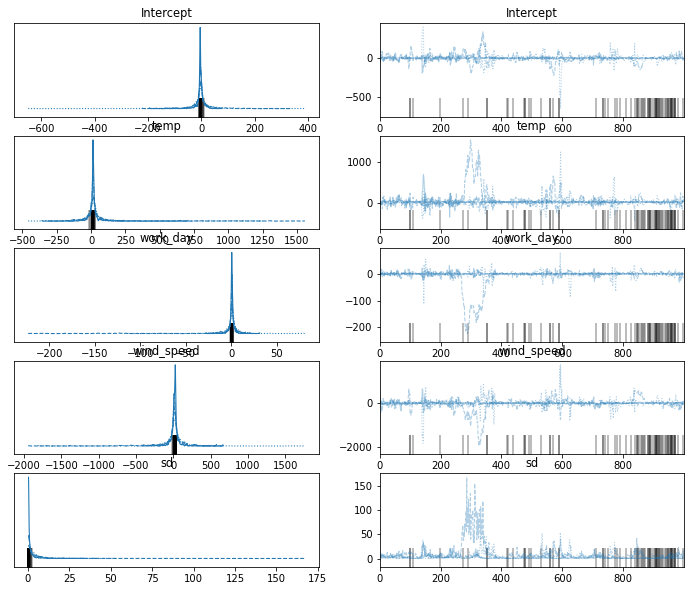

In [8]:

# Draw a trace plot of trace_2
pm.traceplot(trace_2)
plt.show()

We will also be seeing the forest plot of the trace parameters


C:\Users\88016\AppData\Local\Temp/ipykernel_28744/1100666864.py:2: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace_2)


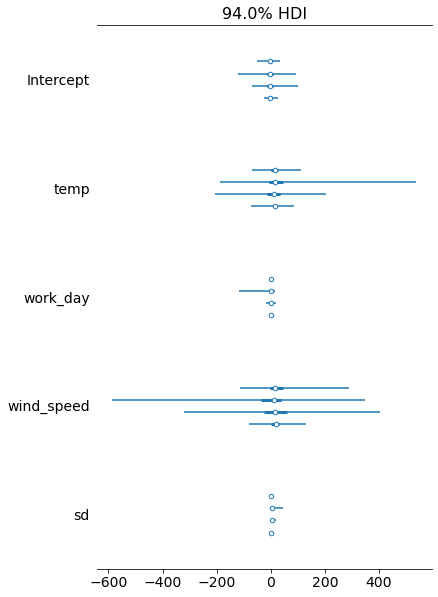

In [9]:

# Draw a forest plot of trace_2
pm.forestplot(trace_2)
plt.show()

And we will also see the summary


In [10]:
pm.summary(trace_2)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-3.738,41.267,-68.869,63.328,1.833,1.297,676.0,254.0,1.09
temp,30.090,138.470,-144.760,168.085,13.481,9.723,440.0,132.0,1.12
work_day,-2.433,21.340,-16.106,15.575,2.787,1.980,258.0,91.0,1.12
wind_speed,4.028,191.887,-275.858,306.156,15.585,11.041,339.0,119.0,1.09
sd,5.086,11.436,0.118,15.235,1.465,1.041,20.0,101.0,1.18
